In [1]:
from hiive.mdptoolbox import mdp
from hiive.mdptoolbox import example
import numpy as np
import pandas as pd
import time 
import matplotlib.pyplot as plt

In [2]:
def plot_graphs(param, curves, curve_labels, param_name="", curve_name=""):
    colors = ['firebrick', 'cadetblue', 'darksalmon', 'mediumseagreen', 'darkmagenta', 'skyblue', 
              'gold','palevioletred', 'olive', 'darkorange', 'mediumpurple', 'slategray', 'darkseagreen']
    plt.figure()
    lines = []
    for i in range(len(curve_labels)):
        l, = plt.plot(param, curves[i,:], ls='-', marker='', color=colors[i])
        lines.append(l)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.legend(handles=lines, labels=curve_labels, loc='best')
    plt.show()

In [41]:
def run_qlearning(P, R, max_iter, gamma = 0.96, alpha=0.3, alpha_decay=0.999999,
                 epsilon=1.0, epsilon_decay=0.99): 

    ql = mdp.QLearning(P,R,gamma = gamma,alpha=alpha,alpha_decay=alpha_decay,epsilon=epsilon,epsilon_decay=0.99)

    ql.max_iter = max_iter 
    ql.run()
    return ql

In [4]:
P, R = example.forest(S=500, p=0.05, r1=10, r2=2)

In [42]:
gamma_max_value = []
gamma_times_api = []
gamma_times_real = []
gamma_policies = []
gamma_policy_updates = []
    
gammas = np.arange(0.1, 1, 0.1)
gamma_max_iter = 1000000

gamma_tot_rew_list = np.zeros((len(gammas), gamma_max_iter))
gamma_mean_v_list = np.zeros((len(gammas), gamma_max_iter))
gamma_max_v_list = np.zeros((len(gammas), gamma_max_iter))

step = 0

for g in gammas:
    # P, R = example.forest(S=5)

    start = time.time()
    ql = run_qlearning(P, R, alpha=0.4, gamma=g, max_iter=gamma_max_iter)
    end = time.time()

    gamma_max_value.append(ql.run_stats[-1]['Max V'])

    bob = pd.DataFrame(ql.run_stats)
    gamma_times_api.append(np.mean(bob['Time'].values))
    gamma_times_real.append(end-start)

    gamma_policies.append(ql.policy)

    gamma_policy_updates.append(len(ql.run_stats))
    
    for it in range(gamma_max_iter):
        gamma_mean_v_list[step, it] = ql.run_stats[it]['Mean V']
        gamma_tot_rew_list[step, it] = ql.run_stats[it]['Reward']
        gamma_max_v_list[step, it] = ql.run_stats[it]['Max V']
        
    step += 1

gamma_df = pd.DataFrame(data=list(zip(gammas, gamma_max_value, gamma_times_api, gamma_times_real, 
                                          gamma_policy_updates, gamma_policies)),
                      columns = ['gamma', 'max_value', 'times_api', 'times_real', 'policy_updates', 'policies'])

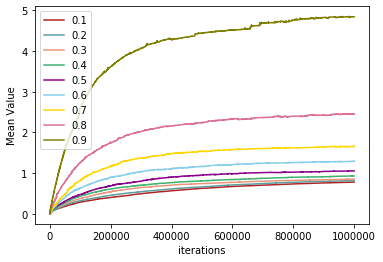

In [44]:
plot_graphs(range(1, gamma_max_iter+1), gamma_mean_v_list, 
            ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], 
            param_name="iterations", curve_name="Mean Value")

In [45]:
gamma_df

1000000

In [46]:
eps_max_value = []
eps_times_api = []
eps_times_real = []
eps_policies = []
eps_policy_updates = []

epsilons = np.arange(0.001, 1.0, 0.1)
eps_max_iter = 1000000

eps_tot_rew_list = np.zeros((len(epsilons), eps_max_iter))
eps_mean_v_list = np.zeros((len(epsilons), eps_max_iter))
eps_max_v_list = np.zeros((len(epsilons), eps_max_iter))
decay = False

if decay:
    ed=0.96
else:
    ed=0.999999

step = 0

for e in epsilons:
    # P, R = example.forest(S=5)
    
    start = time.time()
    ql = run_qlearning(P, R, alpha=0.4, epsilon=e, epsilon_decay=ed, max_iter=eps_max_iter)
    end = time.time()

    eps_max_value.append(ql.run_stats[-1]['Max V'])

    bob = pd.DataFrame(ql.run_stats)
    eps_times_api.append(np.mean(bob['Time'].values))
    eps_times_real.append(end-start)

    eps_policies.append(ql.policy)

    eps_policy_updates.append(len(ql.run_stats))
    
    for it in range(eps_max_iter):
        eps_mean_v_list[step, it] = ql.run_stats[it]['Mean V']
        eps_tot_rew_list[step, it] = ql.run_stats[it]['Reward']
        eps_max_v_list[step, it] = ql.run_stats[it]['Max V']
    step += 1

eps_df = pd.DataFrame(data=list(zip(epsilons, eps_max_value, eps_times_api, eps_times_real, 
                                        eps_policy_updates, eps_policies)),
                      columns = ['epsilons', 'max_value', 'times_api', 'times_real', 
                                 'policy_updates', 'policies'])

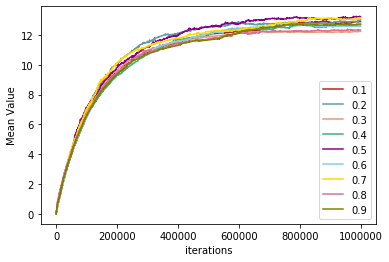

In [47]:
plot_graphs(range(1, eps_max_iter+1), eps_mean_v_list, 
            ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], 
            param_name="iterations", curve_name="Mean Value")

In [33]:
eps_max_value = []
eps_times_api = []
eps_times_real = []
eps_policies = []
eps_policy_updates = []

epsilons = np.arange(0.001, 1.0, 0.1)
eps_max_iter = 1000000

eps_tot_rew_list = np.zeros((len(epsilons), eps_max_iter))
eps_mean_v_list = np.zeros((len(epsilons), eps_max_iter))
eps_max_v_list = np.zeros((len(epsilons), eps_max_iter))
decay = True

if decay:
    ed=0.96
else:
    ed=0.999999

step = 0

for e in epsilons:
    # P, R = example.forest(S=5)
    
    start = time.time()
    ql = run_qlearning(P, R, epsilon=e, epsilon_decay=ed, max_iter=eps_max_iter)
    end = time.time()

    eps_max_value.append(ql.run_stats[-1]['Max V'])

    bob = pd.DataFrame(ql.run_stats)
    eps_times_api.append(np.mean(bob['Time'].values))
    eps_times_real.append(end-start)

    eps_policies.append(ql.policy)

    eps_policy_updates.append(len(ql.run_stats))
    
    for it in range(eps_max_iter):
        eps_mean_v_list[step, it] = ql.run_stats[it]['Mean V']
        eps_tot_rew_list[step, it] = ql.run_stats[it]['Reward']
        eps_max_v_list[step, it] = ql.run_stats[it]['Max V']
    step += 1

eps_df = pd.DataFrame(data=list(zip(epsilons, eps_max_value, eps_times_api, eps_times_real, 
                                        eps_policy_updates, eps_policies)),
                      columns = ['epsilons', 'max_value', 'times_api', 'times_real', 
                                 'policy_updates', 'policies'])

In [ ]:
max_value = []
times_api = []
times_real = []
policies = []
policy_updates = []

lrs = np.arange(0.1, 1, 0.1)
lr_max_iter = 1000000

lr_tot_rew_list = np.zeros((len(lrs), lr_max_iter))
lr_mean_v_list = np.zeros((len(lrs), lr_max_iter))
lr_max_v_list = np.zeros((len(lrs), lr_max_iter))
decay = False

if decay:
    lr_decay=0.96
else:
    lr_decay=0.999999

step = 0

for lr in lrs:
    # P, R = example.forest(S=5)
    
    start = time.time()
    ql = run_qlearning(P, R, max_iter=lr_max_iter, alpha=lr, alpha_decay=lr_decay)
    end = time.time()

    max_value.append(ql.run_stats[-1]['Max V'])

    bob = pd.DataFrame(ql.run_stats)
    times_api.append(np.mean(bob['Time'].values))
    times_real.append(end-start)

    policies.append(ql.policy)

    policy_updates.append(len(ql.run_stats))
    
    for it in range(lr_max_iter):
        lr_mean_v_list[step, it] = ql.run_stats[it]['Mean V']
        lr_tot_rew_list[step, it] = ql.run_stats[it]['Reward']
        lr_max_v_list[step, it] = ql.run_stats[it]['Max V']
        
    step += 1

df_lr = pd.DataFrame(data=list(zip(lrs, max_value, times_api, times_real, policy_updates, policies)),
                      columns = ['learning_rate', 'max_value', 'times_api', 'times_real', 'policy_updates', 'policies'])


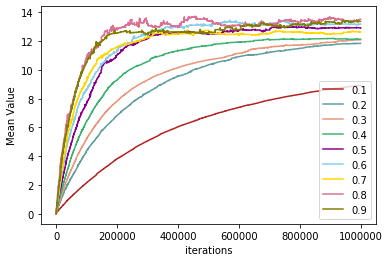

In [28]:
plot_graphs(range(1, lr_max_iter+1), lr_mean_v_list, 
            ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], 
            param_name="iterations", curve_name="Mean Value")

In [48]:
df_lr

,learning_rate,max_value,times_api,times_real,policy_updates,policies
0,0.1,107.113912,27.450920,55.137798,1000000,"(0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, ..."
1,0.2,108.094302,27.759590,55.762458,1000000,"(0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, ..."
2,0.3,123.053187,27.440282,55.430513,1000000,"(0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ..."
3,0.4,119.563463,27.299554,54.979702,1000000,"(0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ..."
4,0.5,102.164972,27.350223,55.176710,1000000,"(0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
5,0.6,103.962564,27.481145,55.340260,1000000,"(0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ..."
6,0.7,93.687077,27.327268,55.030764,1000000,"(0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, ..."
7,0.8,150.965224,27.600390,55.477056,1000000,"(0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, ..."
8,0.9,96.066198,27.172195,54.718537,1000000,"(0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ..."
